In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 折线图

<AxesSubplot:>

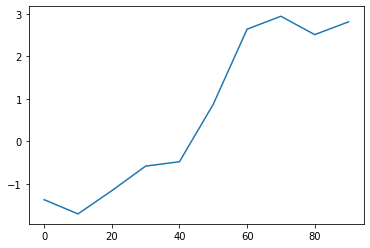

In [27]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

In [28]:
s

0    -1.376374
10   -1.711519
20   -1.165402
30   -0.586440
40   -0.483827
50    0.867883
60    2.635298
70    2.939519
80    2.506984
90    2.807395
dtype: float64

In [29]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10))

In [30]:
df

,A,B,C,D
0,-2.583148,-0.979355,-0.715958,0.069187
10,-1.997137,-1.119092,-3.211031,-2.168465
20,-3.027645,-1.514958,-3.514337,-3.679253
30,-3.614001,-1.320859,-1.746446,-7.589170
40,-6.292398,-1.168706,-1.061154,-6.188239
50,-5.258470,-1.527688,-1.231031,-4.907841
60,-5.523917,-0.316323,-1.097722,-5.715496
70,-5.292477,1.932871,-0.355108,-4.873909
80,-3.440950,2.307089,0.645536,-3.460710
90,-4.048472,1.587530,-0.759165,-3.249807


<AxesSubplot:>

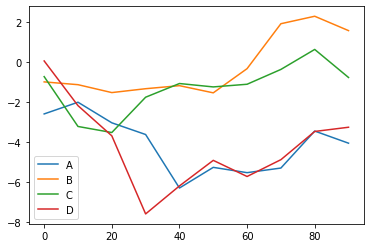

In [32]:
# 这个和下面的柱状图是一样的， df.plot.bar()就是柱状图了
df.plot()

# 柱状图

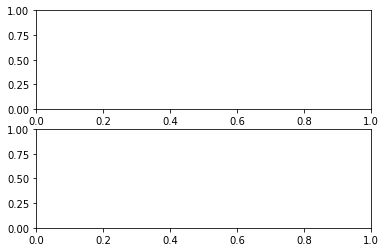

In [33]:
fig, axes = plt.subplots(2, 1)

In [34]:
# 发现np.random.randn()取得包括负数，而rand（）不包括负数
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

<AxesSubplot:>

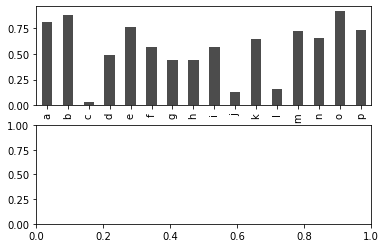

In [35]:
fig

In [36]:
# ax=axes[1]表示在第二个图上画
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

<AxesSubplot:>

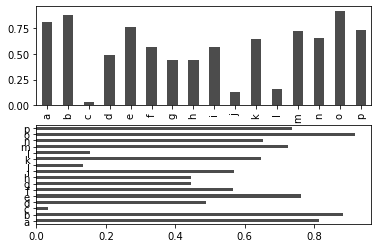

In [37]:
fig

在DataFrame中，柱状图将每一行中的值分组到并排的柱子中的一组

In [38]:
df = pd.DataFrame(np.random.rand(6, 4),
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
# columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus')索引也可以起名字

In [39]:
df

Genus,A,B,C,D
one,0.102383,0.294375,0.330409,0.899422
two,0.898621,0.961010,0.727069,0.491337
three,0.800489,0.597653,0.567594,0.320351
four,0.025425,0.411901,0.094171,0.543662
five,0.825478,0.099292,0.230727,0.980610
six,0.814695,0.498668,0.238903,0.733523


<AxesSubplot:>

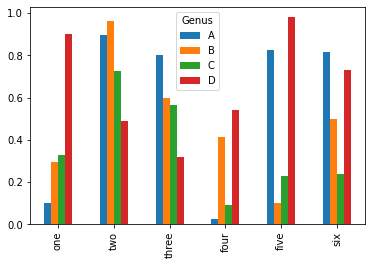

In [40]:
df.plot.bar()

<AxesSubplot:>

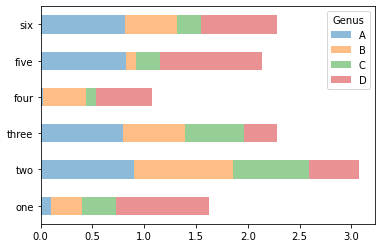

In [41]:
df.plot.barh(stacked=True, alpha=0.5)

In [5]:
tips = pd.read_csv('../examples/tips.csv')

In [6]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [7]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [8]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [9]:
#截取所有的行，和第二到五列
party_counts = party_counts.loc[:, 2:5]

In [10]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [11]:
# 应该是变成分数
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [12]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

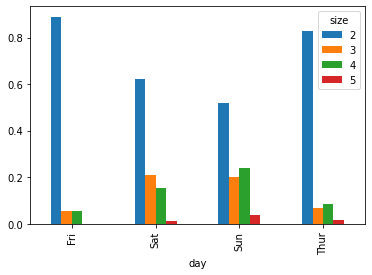

In [13]:
party_pcts.plot.bar()

seaborn的使用

In [14]:
import seaborn as sns

In [15]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [16]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

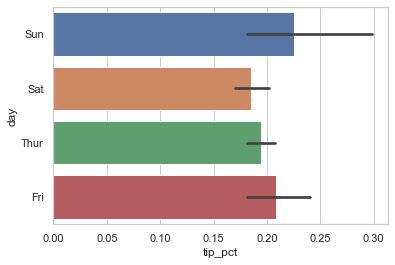

In [27]:
# barplot将点估计和置信区间显示为矩形条。
# orient='h'绘图的方向（垂直或水平）。通常根据输入变量的类型来推断
# data=tips数据
# x='tip_pct', y='day'很明显，这是横纵坐标得名称
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

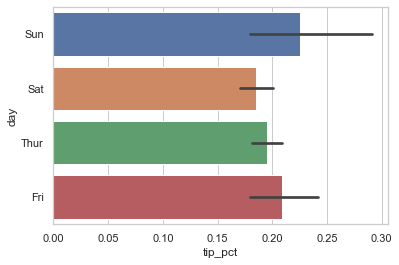

In [23]:
sns.barplot(x='tip_pct', y='day', data=tips)

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

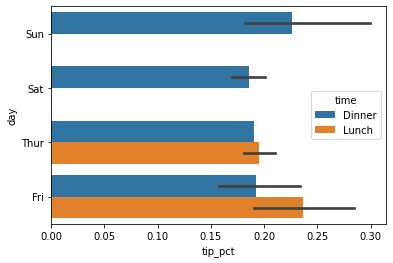

In [18]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [20]:
sns.set(style='whitegrid')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

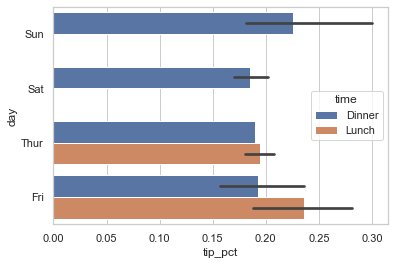

In [21]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

直方图和密度图

In [28]:
tips['tip_pct']

0      0.063204
1      0.191244
2      0.199886
3      0.162494
4      0.172069
         ...   
239    0.256166
240    0.079428
241    0.096759
242    0.108899
243    0.190114
Name: tip_pct, Length: 244, dtype: float64

<AxesSubplot:ylabel='Frequency'>

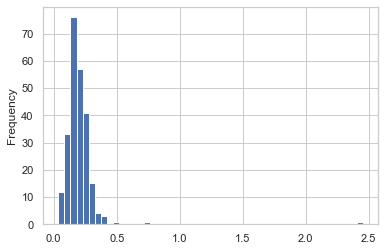

In [29]:
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

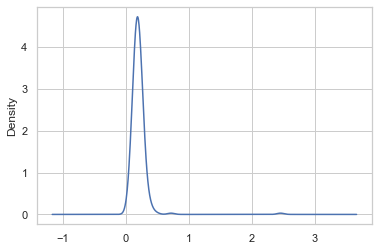

In [30]:
tips['tip_pct'].plot.density()

In [31]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

In [34]:
values = pd.Series(np.concatenate([comp1, comp2]))

In [35]:
values

0       0.421065
1       0.320137
2      -1.607044
3       0.428178
4      -1.033940
         ...    
395    11.067656
396    10.307167
397    12.191691
398    11.418425
399     8.501286
Length: 400, dtype: float64

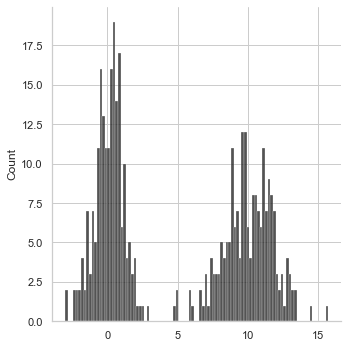

In [33]:
# displot 默认的绘图类型是直方图：
sns.displot(values, bins=100, color='k')

## 散点图或点图

In [36]:
macro = pd.read_csv('../examples/macrodata.csv')

In [37]:
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [38]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


In [39]:
trans_data = np.log(data).diff().dropna()

In [40]:
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


In [41]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


使用seaborn的regplot方法，绘制散点图，并拟合出一条线性回归线

D:\software\software\Anaconda\envs\dataAnalysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Change in log m1 versus log unemp')

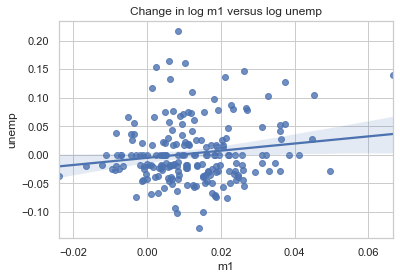

In [45]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Change in log %s versus log %s' % ('m1', 'unemp'))

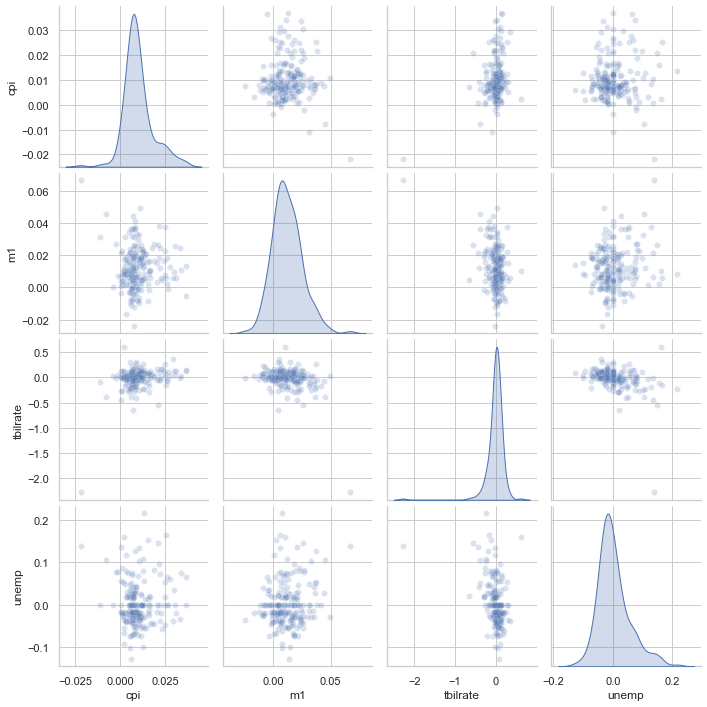

In [47]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})